In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

#convex opt for python: http://cvxopt.org/

In [3]:
style.use('ggplot')

In [45]:
class Support_Vector_Machine:
    #in a class, the init always execute, the others needs to be called
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    # train
    def fit(self, data):
        self.data = data
        # {||w||: [w,b]}
        opt_dict = {}

        # to test negatives values of w (how has the same norm)
        transforms = [[1,1],
                     [-1,1],
                     [1,-1],
                     [-1-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value*0.1,
                     self.max_feature_value*0.01,
                     self.max_feature_value*0.001,]

        # extremely expansive
        b_range_multiple = 5

        #we dont need to take small steps with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])

            # we can do this because of convexity
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple, 
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentaly. SMO attendts to fix this a bit
                        #yi(xi.w+b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                #print(xi,':',yi*(np.dot(w_t,xi)+b))

                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w = w-step

            norms = sorted([n for n in opt_dict])
            opt_choices = opt_dict[norms[0]]

            self.w = opt_choices[0]
            self.b = opt_choices[1]

            latest_optimum = opt_choices[0][0]+step*2 
            
        #print results
        for i in self.data:
            for xi in self.data[i]:
                yi = i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))


    
        
    def predict(self, features):
        # sign(x.w+b)
        classification = np.sign(np.dot(np.array(features), self.w)+self.b) 

        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # x.w+b
        # v = x.w+b
        # psv = 1; nsv = -1; dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        #(w.x+b) = 1
        #positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max],[psv1,psv2])

        #(w.x+b) = -1
        #negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1,nsv2])

        #(w.x+b) = 0
        #decision support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1,db2])

        plt.show()

Optimized a step
Optimized a step
Optimized a step
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 1] : 1.463999999998236


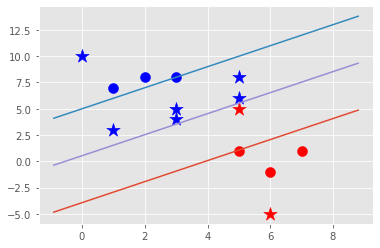

In [46]:
# classification in -1 and 1
#data_dict = {-1^:np.array([[]]),1^:np.array([[]])}

#simple exmaple
data_dict = {-1:np.array([[1,7],
                           [2,8],
                           [3,8],]),
             
             1:np.array([[5,1],
                          [6,-1],
                          [7,1],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
             [1,3],
             [3,4],
             [3,5],
             [5,5],
             [5,6],
             [6,-5],
             [5,8],]

for p in predict_us:
    svm.predict(p)

svm.visualize()